In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler as Scaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn import model_selection
from sklearn.metrics import confusion_matrix
from sklearn import metrics

data = pd.read_csv('DATA/pima.txt',delimiter="	")
columns = ['pregnant','glucose','diastolic','triceps','insulin','bmi','diabetes','age','test']
# print(data)

## Perform simple graphical and numerical summaries of the data.

Can you find any obvious irregularities in the data? If you do, take appropriate steps to correct the problems.

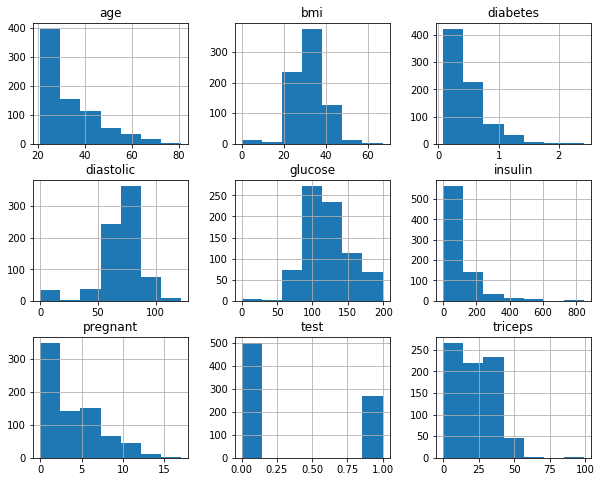

In [2]:
import numpy as np
bins = 1 + np.log(len(data))
# histogram of the whole data
hist = data.hist(bins = int(bins), figsize=(10,8))
plt.show()

In [3]:
non_zero_columns = ['glucose','diastolic','triceps','bmi','diabetes','age', 'insulin']
# subst zero values for the mean values
for column in non_zero_columns:
    median = data[column].median()
# Substitute it in the BMI column of the
# dataset where values are 0
    data[column] = data[column].replace(
    to_replace=0, value=median)


print(data.describe())

         pregnant     glucose   diastolic     triceps     insulin         bmi  \
count  768.000000  768.000000  768.000000  768.000000  768.000000  768.000000   
mean     3.845052  121.656250   72.386719   27.334635   94.652344   32.450911   
std      3.369578   30.438286   12.096642    9.229014  105.547598    6.875366   
min      0.000000   44.000000   24.000000    7.000000   14.000000   18.200000   
25%      1.000000   99.750000   64.000000   23.000000   30.500000   27.500000   
50%      3.000000  117.000000   72.000000   23.000000   31.250000   32.000000   
75%      6.000000  140.250000   80.000000   32.000000  127.250000   36.600000   
max     17.000000  199.000000  122.000000   99.000000  846.000000   67.100000   

         diabetes         age        test  
count  768.000000  768.000000  768.000000  
mean     0.471876   33.240885    0.348958  
std      0.331329   11.760232    0.476951  
min      0.078000   21.000000    0.000000  
25%      0.243750   24.000000    0.000000  
50%   

Histograms of the corrected data

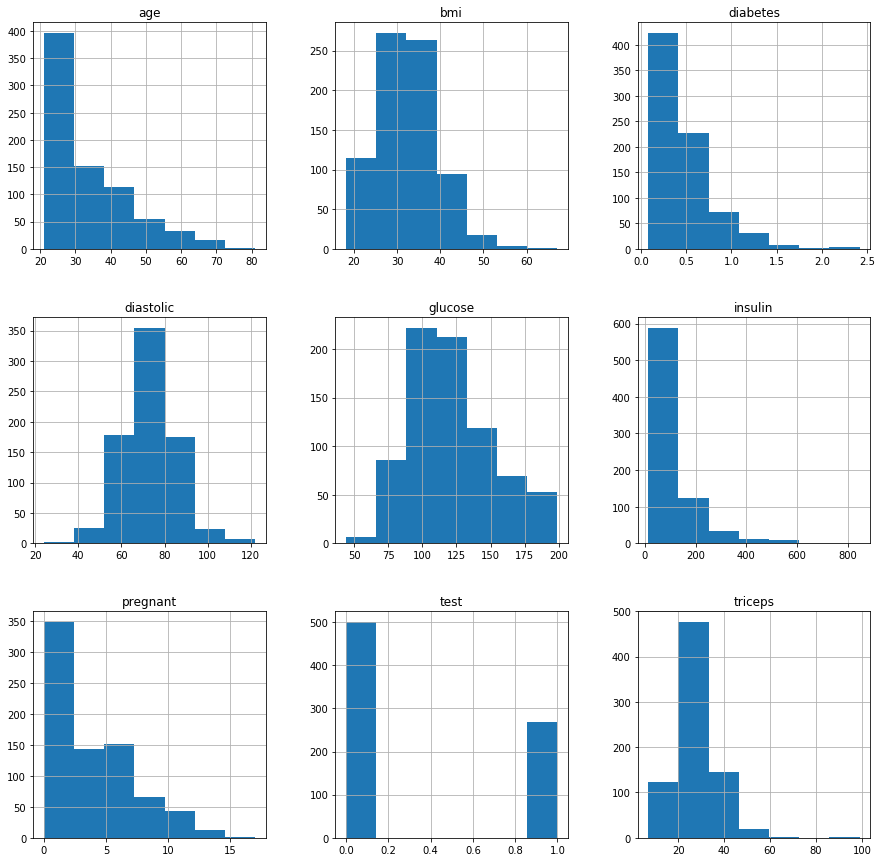

In [4]:
# histogram of the corrected data
bins = (1+np.log(len(data)))
hist = data.hist(figsize=(15,15),bins = int(bins))
plt.show()

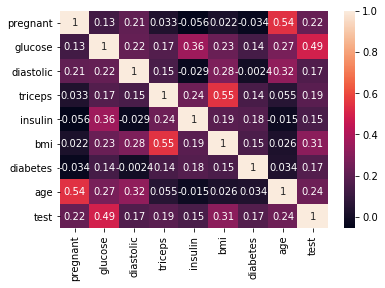

In [5]:
%matplotlib inline
import seaborn as sns
corr = data.corr()
sns.heatmap(corr, annot = True)

The greater the age or the BMI of a patient is, the greater probabilities are the patient can develop type 2 diabetes.

## Fit a model with the result of the diabetes test as the response and all the other variables as predictors. Can you tell whether this model fits the data? 


One of the most important data transformations we need to apply is the features scaling. Basically most of the machine learning algorithms don't work very well if the features have a different set of values. In our case for example the Age ranges from 20 to 80 years old, while the number of times a patient has been pregnant ranges from 0 to 17. For this reason we need to apply a proper transformation.

In [6]:
from sklearn.preprocessing import MinMaxScaler as Scaler

Y = data["test"].copy()
X = data.drop("test", axis=1)

scaler = Scaler()
scaler.fit(X)

X_scaled = scaler.transform(X)
print("SCALED", X_scaled)

mean = np.mean(X, axis=0)
print('Mean: (%d, %d)' % (mean[0], mean[1]))
standard_deviation = np.std(X, axis=0)
print('Standard deviation: (%d, %d)' % (standard_deviation[0], standard_deviation[1]))

X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

SCALED [[0.35294118 0.67096774 0.48979592 ... 0.31492843 0.23441503 0.48333333]
 [0.05882353 0.26451613 0.42857143 ... 0.17177914 0.11656704 0.16666667]
 [0.47058824 0.89677419 0.40816327 ... 0.10429448 0.25362938 0.18333333]
 ...
 [0.29411765 0.49677419 0.48979592 ... 0.16359918 0.07130658 0.15      ]
 [0.05882353 0.52903226 0.36734694 ... 0.24335378 0.11571307 0.43333333]
 [0.05882353 0.31612903 0.46938776 ... 0.24948875 0.10119556 0.03333333]]
Mean: (3, 121)
Standard deviation: (3, 30)


In [19]:
from sklearn import cross_validation, model_selection
model = LogisticRegression()

model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy: %.3f" % accuracy_score(Y_test, Y_pred))

predicted_cross_v = cross_validation.cross_val_predict(model, X_train, Y_train, cv=10)
print("Accuracy for cross validation: %.3f" % accuracy_score(Y_train, predicted_cross_v)) 

scores = model_selection.cross_val_score(model, X_train, Y_train, cv=10)
print(scores)
print('average score: {}'.format(scores.mean()))

Accuracy: 0.786
Accuracy for cross validation: 0.748
[ 0.71428571  0.72580645  0.82258065  0.73770492  0.70491803  0.7704918
  0.72131148  0.73770492  0.7704918   0.7704918 ]
average score: 0.747578756515827



What is the difference in the odds of testing positive for diabetes for a woman with a BMI at the first quartile compared with a woman at the third quartile, if all other factors are held constant?

In [20]:
stats = data['bmi'].describe()

first_quartile = data['bmi'].describe()['25%']
third_quartile = data['bmi'].describe()['75%']

first = data.loc[data['bmi'] < first_quartile]
third = data.loc[data['bmi'] > third_quartile]

odds_first = (first.groupby('test').size())
print("Odds of positive for a women with a BMI at the 1st quartile ", odds_first[1]/len(first))
odds_third = (third.groupby('test').size())
print("Odds of positive for a women with a BMI at the 3rd quartile ", odds_third[1]/len(third))

Odds of positive for a women with a BMI at the 1st quartile  0.105263157895
Odds of positive for a women with a BMI at the 3rd quartile  0.484042553191


## Do women who test positive have higher diastolic blood pressures? 

Mean diastolic blood pressures 68.184000; 70.000000 for a negative case 
Mean diastolic blood pressures 70.824627; 74.000000 for a positive case 


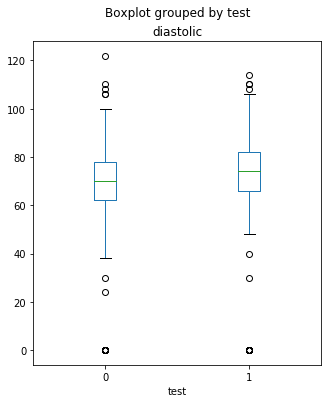

In [22]:
negative = (data.loc[data['test'] == 0].describe()['diastolic'])
positive = (data.loc[data['test'] == 1].describe()['diastolic'])

print("Mean diastolic blood pressures %f; %f for a negative case " % (negative['mean'], negative['50%']))
print("Mean diastolic blood pressures %f; %f for a positive case " % (positive['mean'], positive['50%']))

pressure = data.groupby('test')
boxplot = data.boxplot(column=['diastolic'],by='test', figsize = (5,6),grid=False)
plt.show()

Same prediction on a random data 

In [12]:
print("SCALED", len(data), len(Y))
print(data.describe())



# negative = (data.loc[data['test'] == 0].describe()['diastolic'])
# positive = (data.loc[data['test'] == 1].describe()['diastolic'])

# print("Mean diastolic blood pressures %f; %f for a negative case " % (negative['mean'], negative['50%']))
# print("Mean diastolic blood pressures %f; %f for a positive case " % (positive['mean'], positive['50%']))

# pressure = data.groupby('test')
# boxplot = data.boxplot(column=['diastolic'],by='test', figsize = (5,6),grid=False)
# plt.show()

SCALED 768 768
         pregnant     glucose   diastolic     triceps     insulin         bmi  \
count  768.000000  768.000000  768.000000  768.000000  768.000000  768.000000   
mean     3.845052  121.656250   72.386719   27.334635   94.652344   32.450911   
std      3.369578   30.438286   12.096642    9.229014  105.547598    6.875366   
min      0.000000   44.000000   24.000000    7.000000   14.000000   18.200000   
25%      1.000000   99.750000   64.000000   23.000000   30.500000   27.500000   
50%      3.000000  117.000000   72.000000   23.000000   31.250000   32.000000   
75%      6.000000  140.250000   80.000000   32.000000  127.250000   36.600000   
max     17.000000  199.000000  122.000000   99.000000  846.000000   67.100000   

         diabetes         age        test  
count  768.000000  768.000000  768.000000  
mean     0.471876   33.240885    0.348958  
std      0.331329   11.760232    0.476951  
min      0.078000   21.000000    0.000000  
25%      0.243750   24.000000    0.

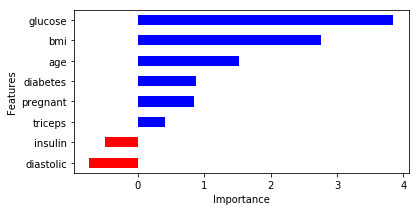

In [13]:
#Importance of the factors for the fitted model 

coeff = list(model.coef_[0])
labels = list(data.drop('test',1).columns)

features = pd.DataFrame()
features['Features'] = labels
features['importance'] = coeff
features.sort_values(by=['importance'], ascending=True, inplace=True)
features['positive'] = features['importance'] > 0
features.set_index('Features', inplace=True)
features.importance.plot(kind='barh', figsize=(6, 3),color = features.positive.map({True: 'blue', False: 'red'}))
plt.xlabel('Importance')
plt.show()

Blood pressure has a negative influence on the prediction, i.e. higher blood pressure is correlated with a person not being diabetic.


### Predict the outcome for a woman with predictor values
1, 99, 64, 22, 76, 27, 0.25, 25 (same order as in the dataset). Give a confidence interval for your prediction.

For confidence interval estimation:
(Texts in statistical science) Faraway, Julian James-Extending the linear model with R _ generalized linear, mixed effects and nonparametric regression models-Chapman & Hall_CR (attached)

In [13]:
import statsmodels.api as sm

model = sm.Logit(Y_train, X_train).fit_regularized()

new_df = pd.DataFrame([[1, 99, 64, 22, 76, 27, 0.25, 25]])
new_df_scaled = scaler.transform(new_df)
new_df_pred = model.predict(new_df_scaled)
print("Result ", new_df_pred)

cov = model.cov_params()
gradient = (new_df_pred * (1 - new_df_pred) * new_df_scaled.T).T # matrix of gradients for each observation
std_errors = np.array([np.sqrt(np.dot(np.dot(g, cov), g)) for g in gradient])
c = 1.96 # multiplier for confidence interval
upper = np.maximum(0, np.minimum(1, new_df_pred + std_errors * c))
lower = np.maximum(0, np.minimum(1, new_df_pred - std_errors * c))

print(upper, lower)



/anaconda3/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.5519656962213156
            Iterations: 78
            Function evaluations: 78
            Gradient evaluations: 78
Result  [0.22096902]
[0.26589249] [0.17604554]


## Use different regressions (binary choice) models and quantify the quality of predictions with different metrics. Which solution is the best?


In [35]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
models = []

models.append(("Logistic Regression:",LogisticRegression()))
models.append(("Naive Bayes:",GaussianNB()))
models.append(("K-Nearest Neighbour:",KNeighborsClassifier(n_neighbors=4)))
models.append(("Decision Tree:",DecisionTreeClassifier()))
models.append(("Support Vector Machine-linear:",SVC(kernel="linear",C=0.2)))
models.append(("Support Vector Machine-rbf:",SVC(kernel="rbf")))
models.append(("Random Forest:",RandomForestClassifier(n_estimators=5)))

results = []
names = []
for name,model in models:
    kfold = KFold(n_splits=5, random_state=3)
    cv_result = cross_val_score(model,X_train,Y_train, cv = kfold,scoring = "accuracy")
    names.append(name)
    results.append(cv_result)
for i in range(len(names)):
    print(names[i],results[i].mean()*100)

Logistic Regression: 73.9424230308
Naive Bayes: 74.5941623351
K-Nearest Neighbour: 73.6225509796
Decision Tree: 71.006264161
Support Vector Machine-linear: 73.1227508996
Support Vector Machine-rbf: 73.6118885779
Random Forest: 73.2906837265
